# Tensorflow visualiazation tools tutorial

## DeepDream

This whole part is based on notebook from from tensorflow avalaible on https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

We will be using tensornets to create our model and OpenCV to load our images.

In [1]:
import tensorflow as tf
import tensornets as nets
import cv2
import conveiro.deep_dream as deep_dream

/home/honza/opt/anaconda3/envs/datalab/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We need to setup input tensors for our model. 

In [2]:
input_pl, input_t = deep_dream.setup()

We create our model with input_t. Model variable in this case represents logits layer of our model but we don't need it in this case. Even if we wanted to visualize individual classes it is better to use layer before logits, otherwise we will get very distorted output, because it is often easier to just minimize other classes instead of optimizing one.

We can use other convolutional models from tensornets such as ResNet or VGG. Only problem is that we need to know names of tensors we want to visualize.

In [3]:
model = nets.Inception1(input_t)

graph = tf.get_default_graph()

sess = tf.Session()

We load pretrained weights for our model. We can store output to blank variable so that we don't get annoying output.

In [4]:
_ = sess.run(model.pretrained())

It is neccessary to choose our objective. With it we can select what neuron/layer to visualize. 

In [5]:
objective = graph.get_tensor_by_name("inception1/block4c/concat:0")

### Multiscale

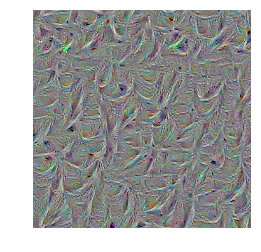

In [6]:
image = deep_dream.render_image_multiscale(objective[..., 10], sess, input_pl)
deep_dream.show_image(deep_dream.normalize_image(image))

### Laplacian Pyramid

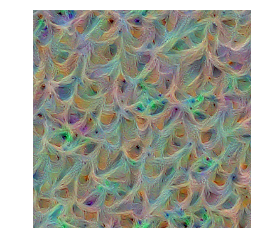

In [7]:
image = deep_dream.render_image_lapnorm(objective[..., 10], sess, input_pl)
deep_dream.show_image(deep_dream.normalize_image(image))

### DeepDream

Because OpenCV uses BGR image format we need to convert it to RGB.

In [9]:
base_image = cv2.imread("mountain.jpeg")[..., ::-1]

Now we can replicate results of DeepDream by Google. Note that the results can vary a bit from original DeepDream because we are using TensorFlow and not Caffe.

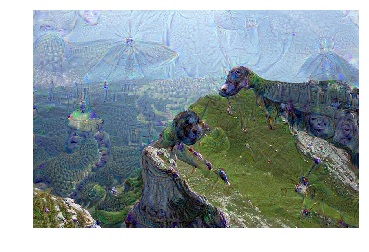

In [10]:
image = deep_dream.render_image_deepdream(objective, sess, input_pl, base_image)
deep_dream.show_image(image / 255)